In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
file_path="Amazon_Best_Selling_Books.xlsx"
data = pd.read_excel(file_path)

In [64]:
data.shape

(1291, 10)

In [65]:
data.sample(5)

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
1256,1256,16.75,66.0,Think Again: The Power of Knowing What You Don...,12028.0,4.6,Adam Grant,Hardcover,2021,Non Fiction
414,414,16.60,22.0,"David and Goliath: Underdogs, Misfits, and the...",7251.0,4.5,Malcolm Gladwell,Hardcover,2013,Non Fiction
394,394,16.20,2.0,"Lean In: Women, Work, and the Will to Lead",8182.0,4.5,Sheryl Sandberg,Hardcover,2013,Non Fiction
1130,1130,8.95,40.0,Paint by Sticker Kids: Unicorns & Magic: Creat...,18971.0,4.8,Workman Publishing,Paperback,2020,Non Fiction
1191,1191,11.98,1.0,Atomic Habits: An Easy & Proven Way to Build G...,84079.0,4.8,James Clear,Hardcover,2021,Non Fiction


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1291 non-null   int64  
 1   price          1287 non-null   float64
 2   ranks          1287 non-null   float64
 3   title          1286 non-null   object 
 4   no_of_reviews  1287 non-null   float64
 5   ratings        1287 non-null   float64
 6   author         1286 non-null   object 
 7   cover_type     1286 non-null   object 
 8   year           1291 non-null   int64  
 9   genre          1288 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 101.0+ KB


# Data Cleaning and Preprocessing

In [67]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [68]:
data.isnull().sum()

price            4
ranks            4
title            5
no_of_reviews    4
ratings          4
author           5
cover_type       5
year             0
genre            3
dtype: int64

# Impute missing data

In [69]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [70]:
trf = ColumnTransformer([
    # ('imputer1', SimpleImputer(strategy="mean"),['price', "ranks", 'no_of_reviews', "ratings"]),
    ("imputer2", KNNImputer(n_neighbors=3,weights='distance'),['price', "ranks", 'no_of_reviews', "ratings"]),
    ("imputer3", SimpleImputer(strategy="most_frequent"),["cover_type", "genre"] ),
    ("imputer4", SimpleImputer(strategy="constant", fill_value="Missing"), ["title", "author"]),
    ## ("ordinal_encoder", OrdinalEncoder(), ["cover_type", "genre"])
],remainder='passthrough')
trf.fit(data)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer2',
                                 KNNImputer(n_neighbors=3, weights='distance'),
                                 ['price', 'ranks', 'no_of_reviews',
                                  'ratings']),
                                ('imputer3',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['cover_type', 'genre']),
                                ('imputer4',
                                 SimpleImputer(fill_value='Missing',
                                               strategy='constant'),
                                 ['title', 'author'])])

In [71]:
df_transform = trf.transform(data)

In [72]:
df_transformed = pd.DataFrame(df_transform)

In [73]:
new_columns = {
    0: 'Price',
    1: 'No_of_reviews',    
    2: 'Rating',
    3: 'Published_Year', 
    4: 'Cover_type',
    5: 'Genre',       
    6: "Title",
    7: 'Author',
    8: 'Sales_Rank',

}
df_transformed.rename(columns=new_columns, inplace=True)

## Standardize categorical data and normalize numerical data

In [74]:
from sklearn.preprocessing import RobustScaler

In [75]:
trf2 = ColumnTransformer([
        ("ordinal_encoder", OrdinalEncoder(), [4,5]),
        # ("robust_scaler", RobustScaler(), [2]),
],remainder='passthrough')
trf2.fit(df_transformed)


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_encoder', OrdinalEncoder(), [4, 5])])

In [76]:
df_transform2 = trf2.transform(df_transformed)

In [77]:
df_transformed2 = pd.DataFrame(df_transform2)

In [78]:
new_columns = {
    0: 'Cover_type',
    1: 'Genre',
    2: 'Price',
    3: 'Sales_Rank',
    4: 'No_of_reviews',
    5: 'Rating',    
    6: "Title",
    7: 'Author',
    8: 'Published_Year'
}
df_transformed2.rename(columns=new_columns, inplace=True)

numerical_columns = ['Price', 'Sales_Rank', 'No_of_reviews', 'Rating', "Published_Year"]
df_transformed2[numerical_columns] = df_transformed2[numerical_columns].apply(pd.to_numeric)

categorical_columns = ["Cover_type", "Genre", "Title", "Author"]
df_transformed2[categorical_columns] = df_transformed2[categorical_columns].astype(str)


new_order = ['Price', 'No_of_reviews', 'Rating', "Published_Year", 'Cover_type', "Genre", "Title", "Author", 'Sales_Rank']
df_transformed2 = df_transformed2[new_order]

In [79]:
df = df_transformed2.copy()

## Remove duplicates and outliers

In [80]:
df.duplicated().sum()

0

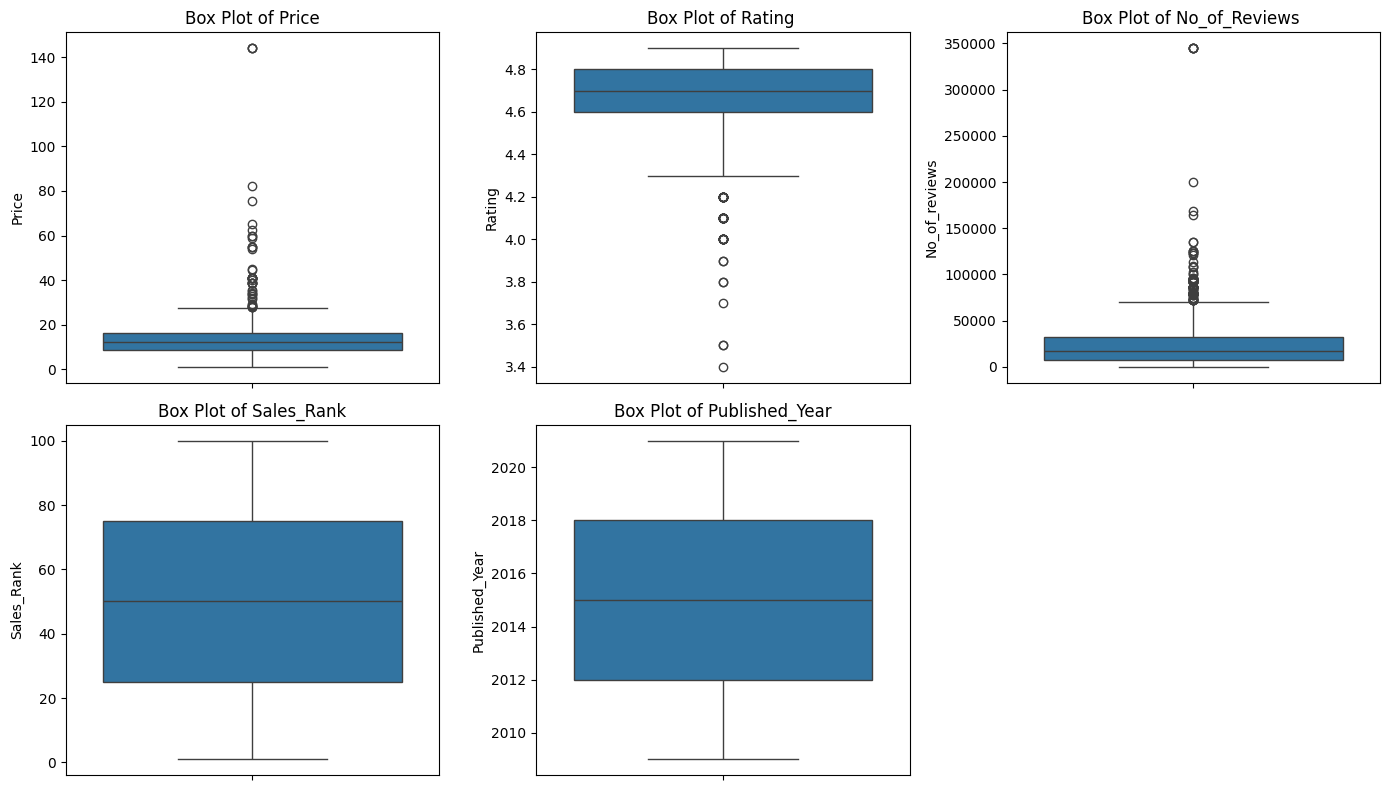

In [81]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))

ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

ax1.set_title('Box Plot of Price')
sns.boxplot(df['Price'], ax=ax1)

ax2.set_title('Box Plot of Rating ')
sns.boxplot(df['Rating'], ax=ax2)

ax3.set_title('Box Plot of No_of_Reviews ')
sns.boxplot(df['No_of_reviews'], ax=ax3)

ax4.set_title('Box Plot of Sales_Rank')
sns.boxplot(df['Sales_Rank'], ax=ax4)

ax5.set_title('Box Plot of Published_Year')
sns.boxplot(df['Published_Year'], ax=ax5)

# Optionally hide the sixth subplot (if not needed)
ax6.set_visible(False)

plt.tight_layout()
plt.show()

Function to remove Outliers 

In [82]:
def removing_outliers(col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[col] = np.where(
    df[col] > upper_limit,
    upper_limit,
    np.where(
        df[col] < lower_limit,
        lower_limit,
        df[col]
    )
)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

    ax1.set_title('Box Plot before removing outliers')
    sns.boxplot(df_transformed2[col], ax=ax1)


    ax2.set_title('Box Plot after removing Outliers')
    sns.boxplot(df[col], ax=ax2)

    plt.show()

Calling Function to remove Outliers from Price

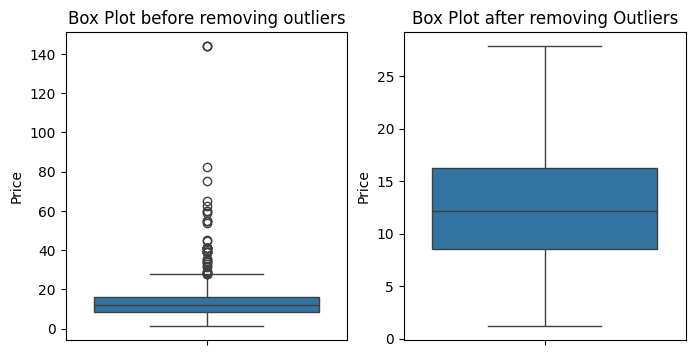

In [83]:
removing_outliers("Price")

Calling Function to remove Outliers from Ratings

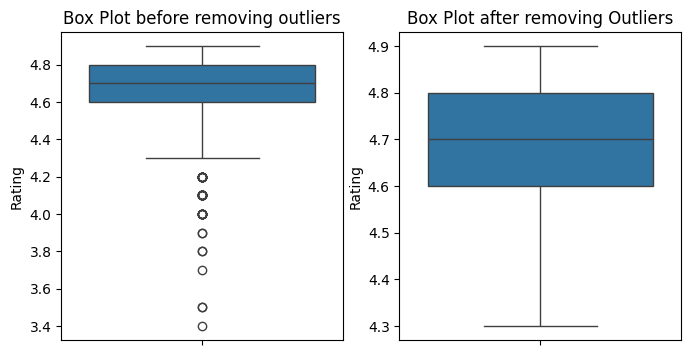

In [84]:
removing_outliers("Rating")

Calling Function to remove Outliers from No_of_reviews

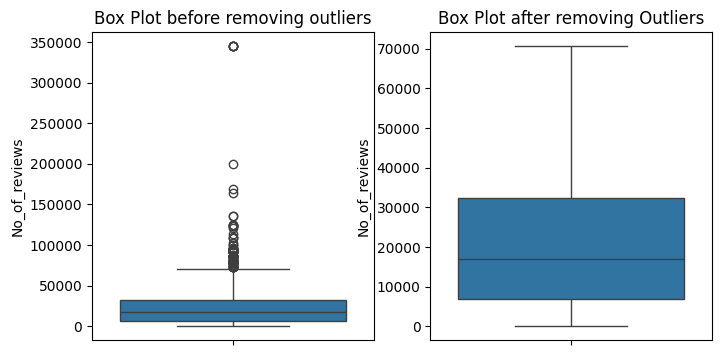

In [85]:
removing_outliers("No_of_reviews")

# Exploratory Data Analysis (EDA)

## Descriptive statistics

In [86]:
df.describe()

,Price,No_of_reviews,Rating,Published_Year,Sales_Rank
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000
mean,13.007133,23248.478583,4.661351,2015.027111,50.246309
std,5.891325,20925.669112,0.165260,3.734404,28.758617
min,1.170000,50.000000,4.300000,2009.000000,1.000000
25%,8.550000,6790.000000,4.600000,2012.000000,25.000000
50%,12.150000,16852.000000,4.700000,2015.000000,50.246309
75%,16.275000,32326.000000,4.800000,2018.000000,75.000000
max,27.862500,70630.000000,4.900000,2021.000000,100.000000


In [87]:
df.iloc[: , 0:3]

,Price,No_of_reviews,Rating
0,12.49,16118.0,4.4
1,13.40,23392.0,4.7
2,9.93,5036.0,4.8
3,14.30,16912.0,4.7
4,9.99,1572.0,4.6
...,...,...,...
1286,16.69,21401.0,4.8
1287,7.49,70630.0,4.7
1288,8.95,15753.0,4.8
1289,7.59,7246.0,4.8


In [88]:
print("Median of Numeric Columns")
med1 = df.iloc[: , 0:4].median()
med2 = df.iloc[: , 8:].median()
print(med1)
print(med2)


Median of Numeric Columns
Price                12.15
No_of_reviews     16852.00
Rating                4.70
Published_Year     2015.00
dtype: float64
Sales_Rank    50.246309
dtype: float64


In [89]:
mode = df.mode()
print("Mode of Numeric Columns")
mode.iloc[0, : ]

Mode of Numeric Columns


Price                                                       27.8625
No_of_reviews                                               70630.0
Rating                                                          4.7
Published_Year                                               2012.0
Cover_type                                                      2.0
Genre                                                           1.0
Title             Publication Manual of the American Psychologic...
Author                                                 Rick Riordan
Sales_Rank                                                      1.0
Name: 0, dtype: object

In [90]:
# Save the cleaned dataset to a new CSV file
output_file = 'Cleaned_Dataset.csv'
df.to_csv(output_file, index=False)

print(f"\nCleaned dataset saved as '{output_file}' in the current folder.")


Cleaned dataset saved as 'Cleaned_Dataset.csv' in the current folder.


## Distribution analysis

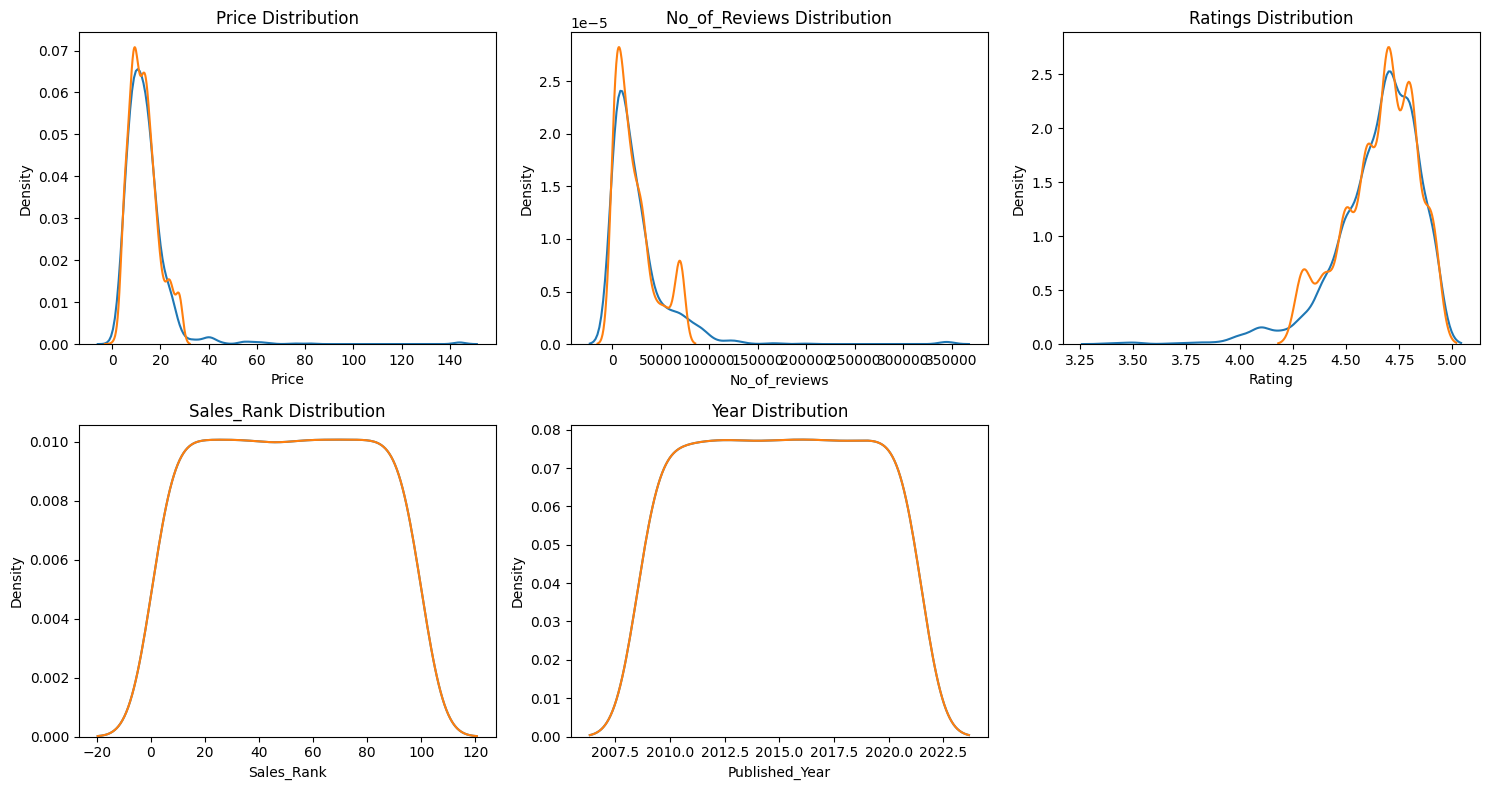

In [91]:
fig, axes= plt.subplots(ncols=3, nrows=2, figsize=(15, 8))

ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

ax1.set_title('Price Distribution')
sns.kdeplot(df_transformed2['Price'], ax=ax1)
sns.kdeplot(df['Price'], ax=ax1)

ax2.set_title('No_of_Reviews Distribution')
sns.kdeplot(df_transformed2['No_of_reviews'], ax=ax2)
sns.kdeplot(df['No_of_reviews'], ax=ax2)

ax3.set_title('Ratings Distribution')
sns.kdeplot(df_transformed2['Rating'], ax=ax3)
sns.kdeplot(df['Rating'], ax=ax3)

ax4.set_title('Sales_Rank Distribution')
sns.kdeplot(df_transformed2['Sales_Rank'], ax=ax4)
sns.kdeplot(df['Sales_Rank'], ax=ax4)



ax5.set_title('Year Distribution')
sns.kdeplot(df_transformed2['Published_Year'], ax=ax5)
sns.kdeplot(df['Published_Year'], ax=ax5)

ax6.set_visible(False)

plt.tight_layout()
plt.show()

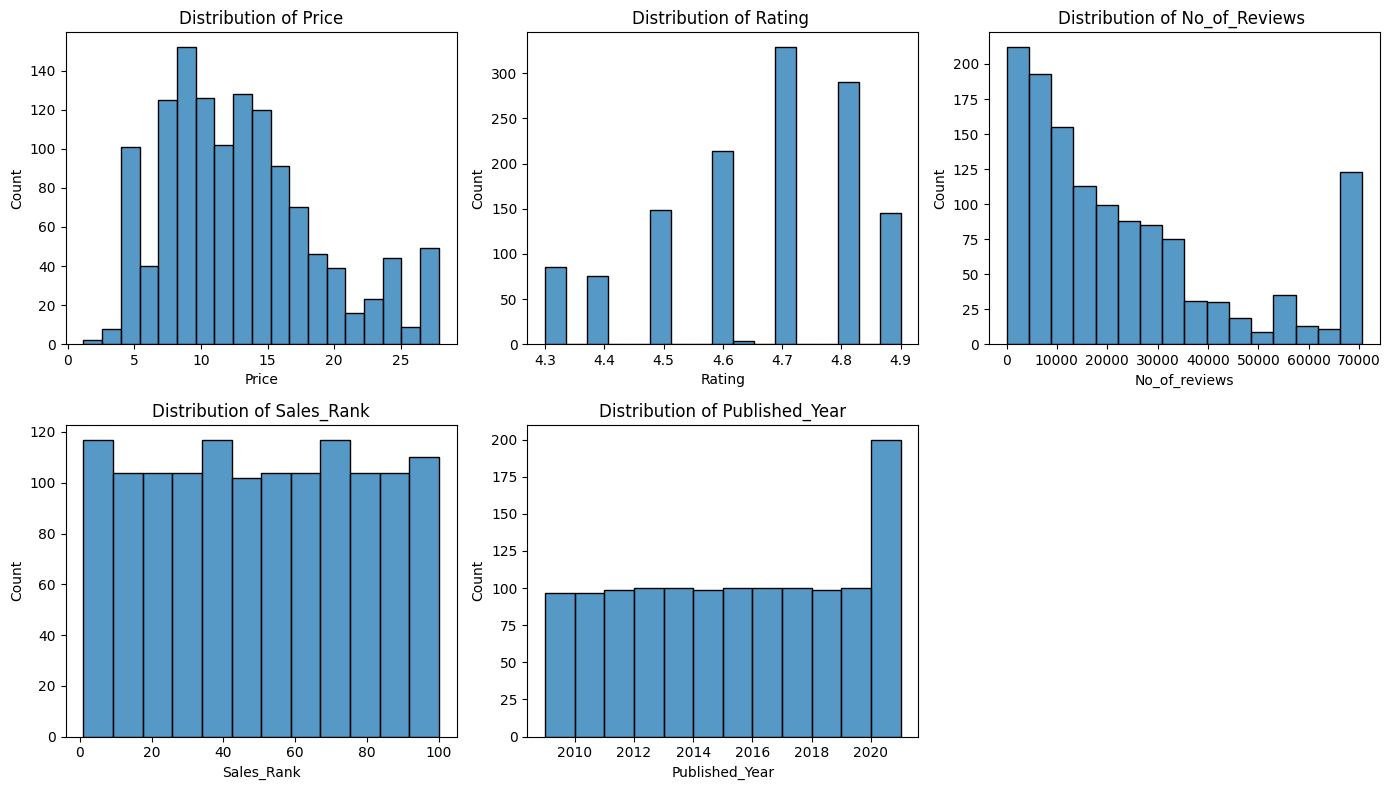

In [92]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))

ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

ax1.set_title('Distribution of Price')
sns.histplot(df['Price'], ax=ax1)

ax2.set_title('Distribution of Rating ')
sns.histplot(df['Rating'], ax=ax2)

ax3.set_title('Distribution of No_of_Reviews ')
sns.histplot(df['No_of_reviews'], ax=ax3)

ax4.set_title('Distribution of Sales_Rank')
sns.histplot(df['Sales_Rank'], ax=ax4)

ax5.set_title('Distribution of Published_Year')
sns.histplot(df['Published_Year'], ax=ax5)

# Optionally hide the sixth subplot (if not needed)
ax6.set_visible(False)

plt.tight_layout()
plt.show()

## Correlation analysis

In [93]:
from sklearn. metrics import confusion_matrix

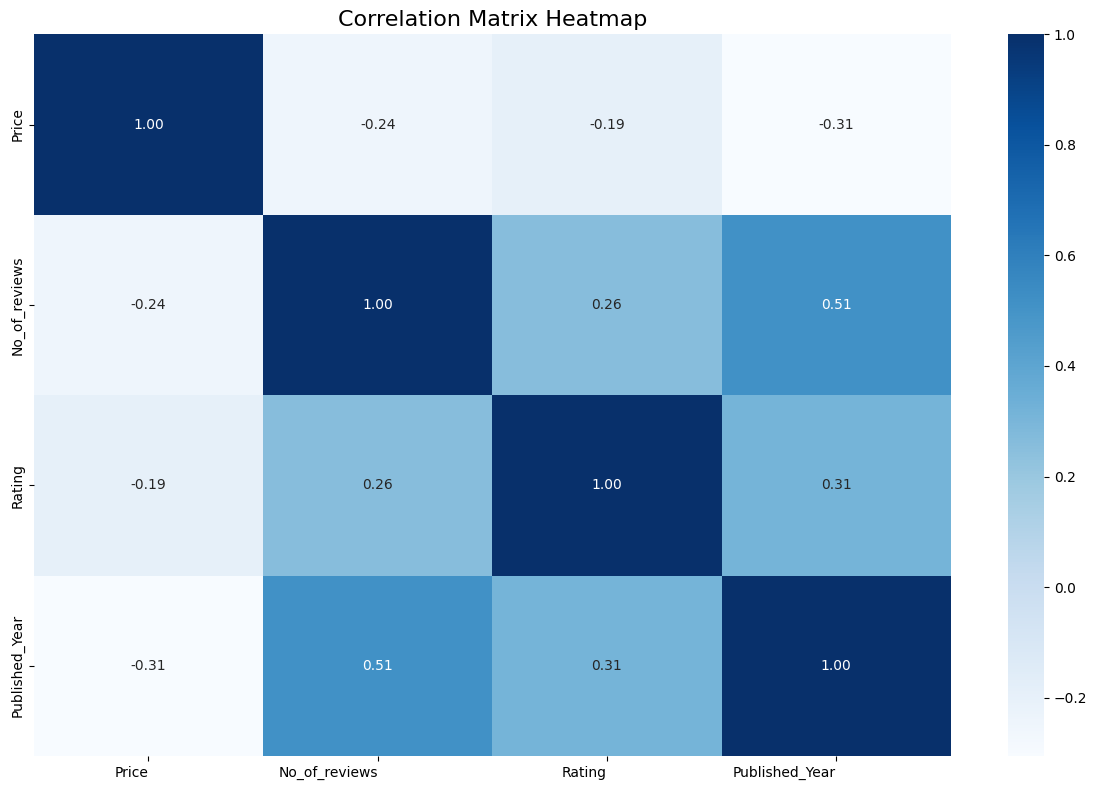

In [94]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:, :4].corr(), annot=True,  cmap='Blues', fmt='.2f')

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=0, ha='right', fontsize=10) 
plt.yticks(rotation=90, fontsize=10) 

plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

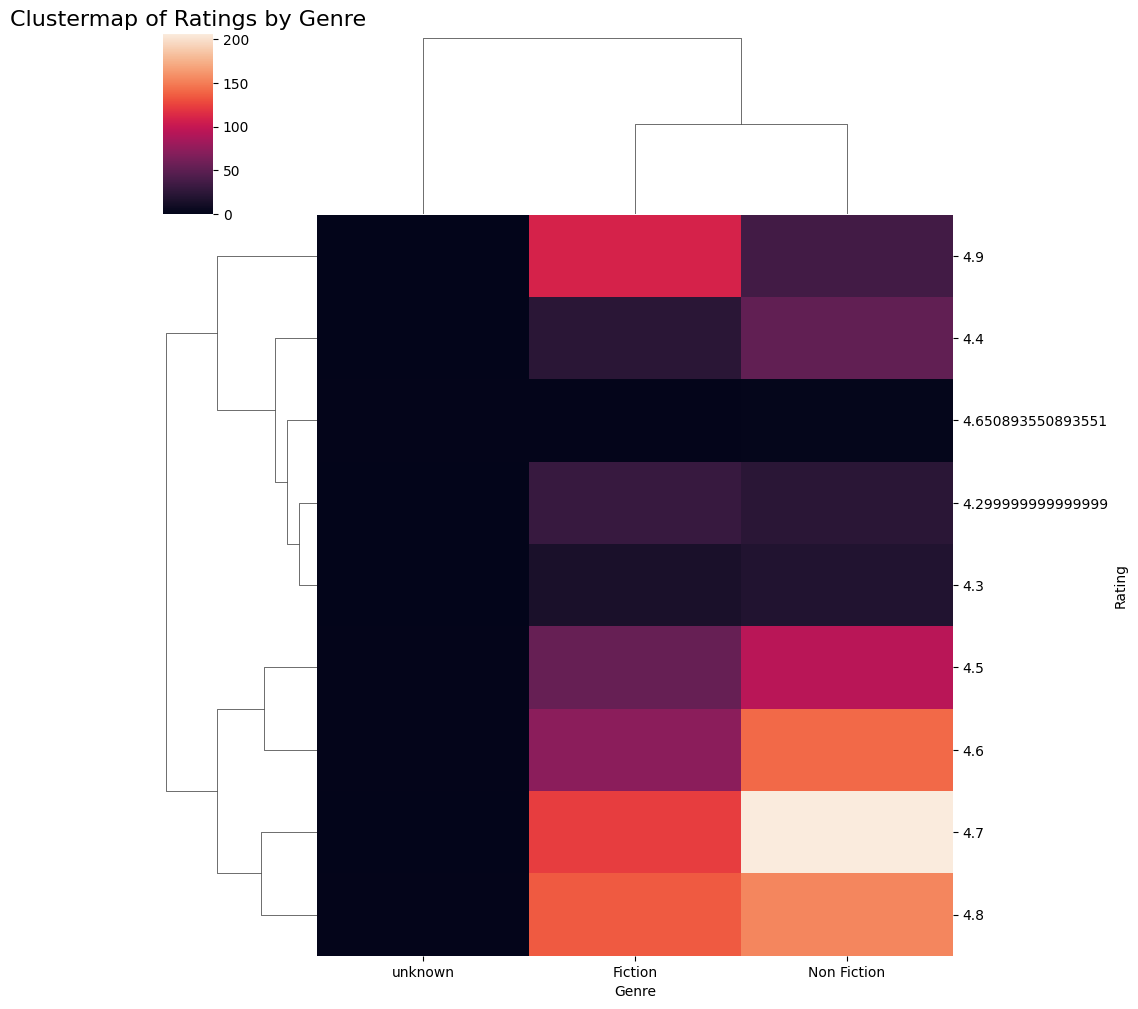

In [95]:
plt.figure(figsize=(6, 4))

sns.clustermap(pd.crosstab( df['Rating'] , df_transformed['Genre']))# Label for the color bar )

plt.title('Clustermap of Ratings by Genre', fontsize=16)

plt.show()

# Visualization

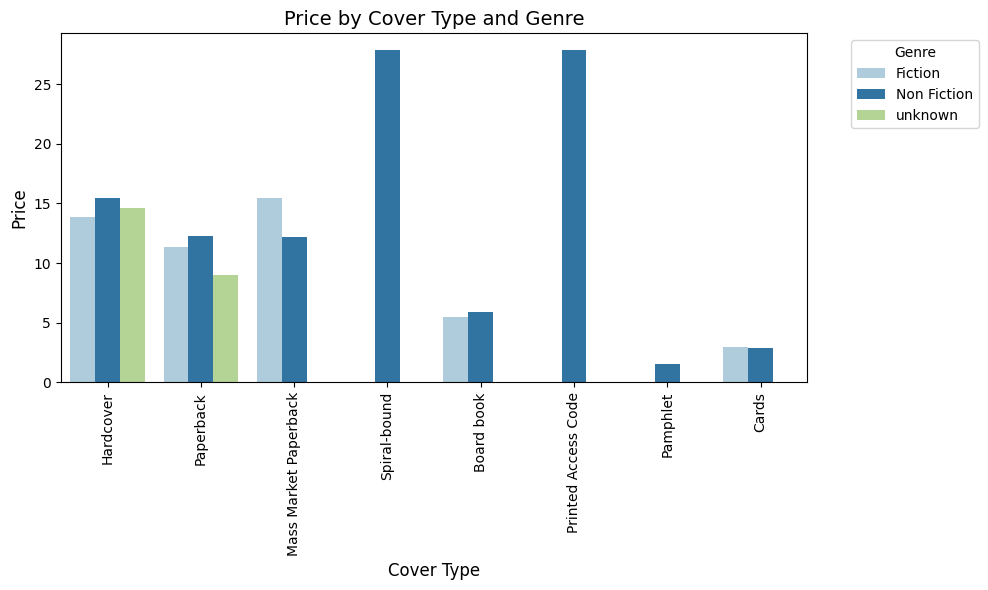

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_transformed['Cover_type'], y=df['Price'], hue=df_transformed['Genre'], palette="Paired", errorbar=None)

plt.title('Price by Cover Type and Genre', fontsize=14)
plt.xlabel('Cover Type', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.xticks(rotation=90)

plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_29652\2031290934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_transformed["Genre"], palette="tab20" , order=df_transformed['Genre'].value_counts().index)


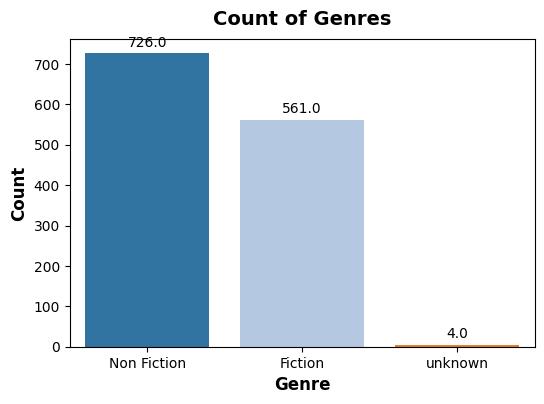

In [97]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(x=df_transformed["Genre"], palette="tab20" , order=df_transformed['Genre'].value_counts().index)

plt.title('Count of Genres', fontsize=14, fontweight='bold', color='Black', pad=10)
plt.xlabel('Genre', fontsize=12, fontweight='bold', color='Black')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='Black')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


C:\Users\dell\AppData\Local\Temp\ipykernel_29652\1289747603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_transformed["Cover_type"], palette="inferno", order=df_transformed["Cover_type"].value_counts().index)


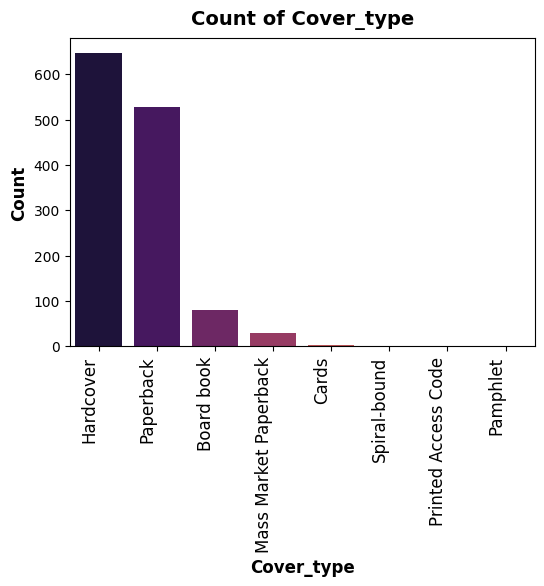

In [98]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(x=df_transformed["Cover_type"], palette="inferno", order=df_transformed["Cover_type"].value_counts().index)

plt.title('Count of Cover_type', fontsize=14, fontweight='bold', color='Black', pad=10)
plt.xlabel('Cover_type', fontsize=12, fontweight='bold', color='Black')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='Black')
plt.xticks(rotation=90, ha='right', fontsize=12)

plt.show()


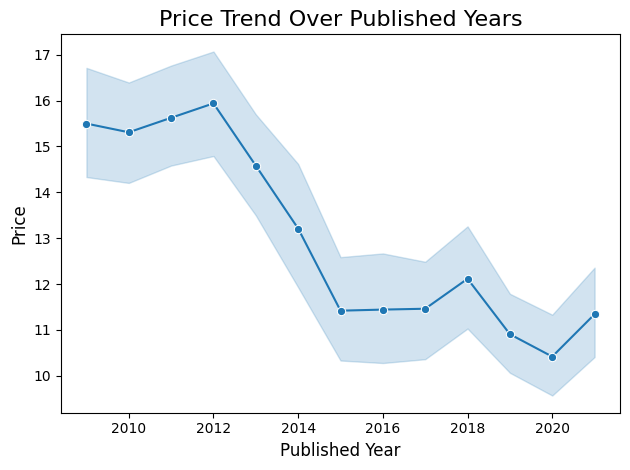

In [99]:
sns.lineplot(x=df['Published_Year'], y=df['Price'], marker='o')

plt.title('Price Trend Over Published Years', fontsize=16)
plt.xlabel('Published Year', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.tight_layout()
plt.show()

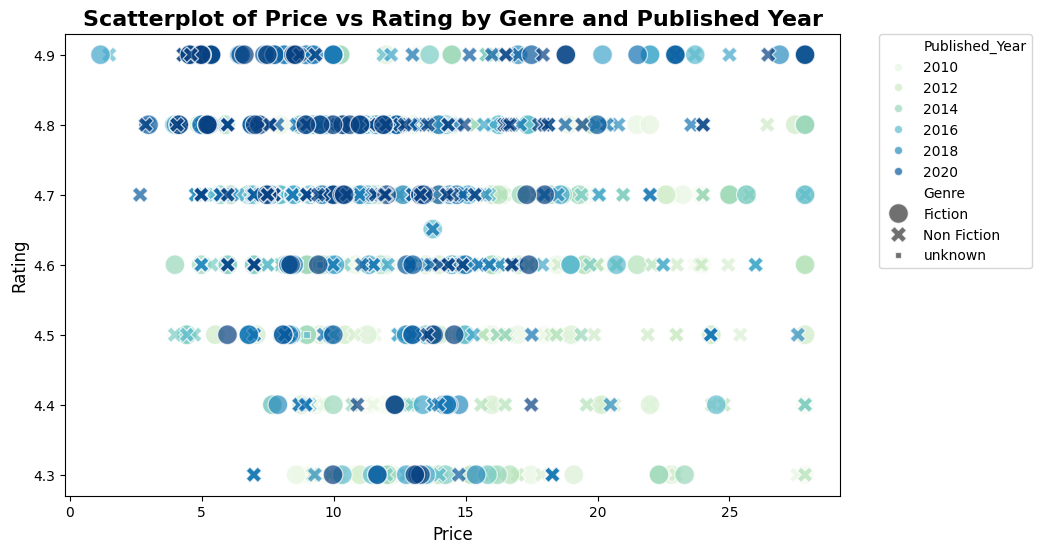

In [100]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df["Price"], y=df["Rating"], hue=df["Published_Year"], style=df_transformed["Genre"], size=df_transformed["Genre"],
                 sizes=(50, 200),palette="GnBu", alpha=0.7)

plt.title("Scatterplot of Price vs Rating by Genre and Published Year", fontsize=16, fontweight='bold')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


# Statistical Analysis

## Hypothesis testing: T-tests, chi-square tests to determine significance of findings

In [101]:

# Ensure 'Price' is numeric
from scipy import stats


df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remove any rows where 'Price' is NaN
df_cleaned = df.dropna(subset=['Price'])

# Separate prices by genre
genre_1_prices = df_cleaned[df_cleaned['Genre'] == "0.0"]['Price']
genre_2_prices = df_cleaned[df_cleaned['Genre'] == "1.0"]['Price']

# Perform independent T-test
t_stat, p_value = stats.ttest_ind(genre_1_prices, genre_2_prices, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. The means are significantly different.")
else:
    print("We fail to reject the null hypothesis. No significant difference in means.")


T-statistic: -4.508524880413559
P-value: 7.175183051529786e-06
We reject the null hypothesis. The means are significantly different.


T-statistic: -4.51, which is a large negative value indicating a significant difference between the two means.
P-value: 7.18e-06 (which is 0.00000718), much smaller than the alpha threshold of 0.05.

Conclusion: 
We reject the null hypothesis, which means there is a statistically significant difference in the average prices between Fiction and Non Fiction genres.
This implies that the prices for books in the two genres are not the same, and the observed difference is unlikely due to random chance.

C:\Users\dell\AppData\Local\Temp\ipykernel_29652\224679769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Price', data=df_cleaned, palette='Set2')


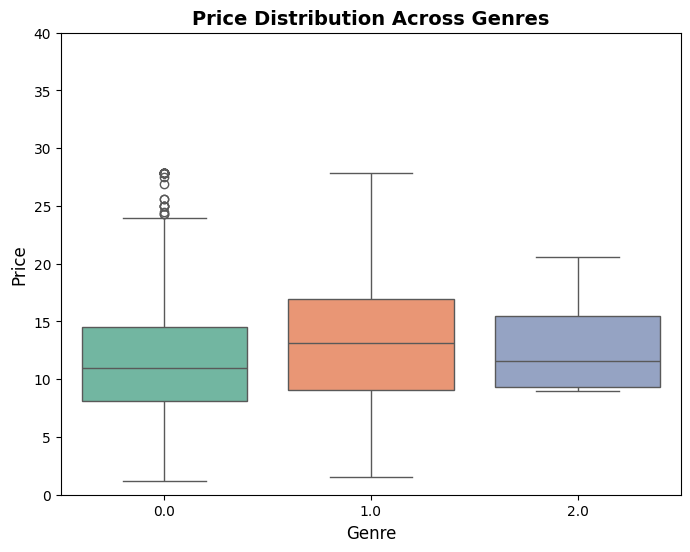

In [102]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='Genre', y='Price', data=df_cleaned, palette='Set2')
plt.title('Price Distribution Across Genres', fontsize=14, fontweight='bold')

plt.xlabel('Genre', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.ylim(0, 40)

plt.xticks(rotation=0)
plt.show()

Observations:

Fiction:
The central tendency (median) of prices is slightly higher than Non Fiction.
There are several outliers above the maximum whisker, suggesting some high-priced books in this category.

Non Fiction:
The median price is close to Fiction, but the range of prices seems slightly narrower, with fewer extreme outliers.

Unknown:
There is very little variation in prices for books categorized as Unknown, and it has the lowest median price overall.

In [103]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Cover_type'], df['Genre'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant association between Cover_type and Genre.")
else:
    print("We fail to reject the null hypothesis. No significant association between Cover_type and Genre.")


Chi2 Stat: 68.94841684405985
P-value: 2.9905727065221996e-09
We reject the null hypothesis. There is a significant association between Cover_type and Genre.


The Chi-square test results suggest a significant association between the Cover_type and Genre of the books:

Chi2 Stat: 68.95
P-value: 2.99e-09, which is far below the significance level (alpha = 0.05).
Conclusion:
Since the P-value is much smaller than 0.05, we reject the null hypothesis, which means there is a statistically significant association between the Cover_type and Genre. This implies that the distribution of cover types (e.g., hardcover, paperback) differs based on the genre of the book.

## Regression analysis: Linear regression to identify factors that predict sales rank

In [104]:
def RMSE(y,y_pred):
    E=y-y_pred
    SE=E**2
    MSE=SE.mean()
    RMSE=np.sqrt(MSE)
    return RMSE

In [105]:
df.iloc[: , 0:6]

,Price,No_of_reviews,Rating,Published_Year,Cover_type,Genre
0,12.49,16118.0,4.4,2009,2.0,0.0
1,13.40,23392.0,4.7,2009,5.0,0.0
2,9.93,5036.0,4.8,2009,2.0,1.0
3,14.30,16912.0,4.7,2009,2.0,0.0
4,9.99,1572.0,4.6,2009,2.0,1.0
...,...,...,...,...,...,...
1286,16.69,21401.0,4.8,2021,2.0,1.0
1287,7.49,70630.0,4.7,2021,5.0,1.0
1288,8.95,15753.0,4.8,2021,2.0,0.0
1289,7.59,7246.0,4.8,2021,2.0,1.0


In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[: , 0:6], df["Sales_Rank"],test_size=0.2,random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [109]:
y_pred = model.predict(X_test)

In [110]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [111]:
print("Linear Regression - Mean Absolute Error = ",mean_absolute_error(y_test,y_pred))

print("Linear Regression - Root Mean Squared Error =",RMSE(y_test,y_pred))

Linear Regression - Mean Absolute Error =  23.358321091529778
Linear Regression - Root Mean Squared Error = 27.31705682671779


In [112]:
X_test.shape

(259, 6)

In [113]:
from sklearn.preprocessing import PolynomialFeatures

In [114]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [115]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [116]:
y_pred2 = lr.predict(X_test_trans)

In [117]:
(r2_score(y_test,y_pred2))*100

2.22683960281016

## Clustering using k-means clustering

In [118]:
from sklearn.cluster import KMeans

Determine the optimal number of clusters using the elbow method

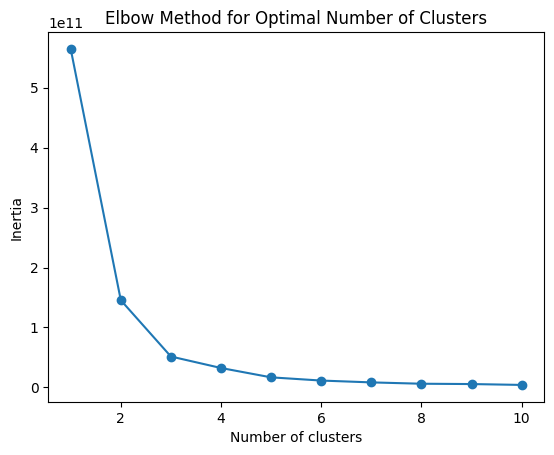

In [119]:
X = df.iloc[: , 0:6]

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [120]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42,max_iter=500)
kmeans.fit(X)

KMeans(max_iter=500, n_clusters=3, random_state=42)

In [121]:
df['Cluster'] = kmeans.labels_

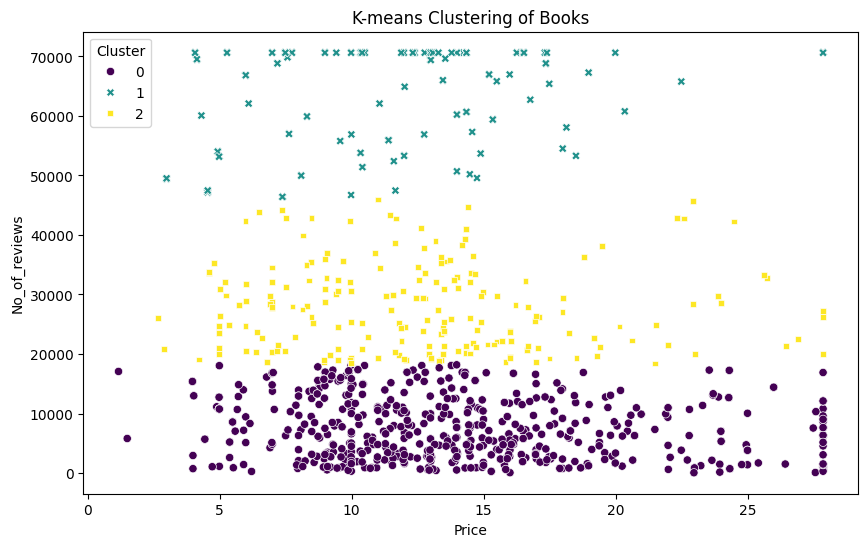

In [122]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='No_of_reviews', hue='Cluster', palette='viridis', style='Cluster')
plt.title('K-means Clustering of Books')
plt.show()